- `minMaxScaler()`
  - intervalo padrão: 0 a 1.


**References**
- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
- https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#3abe
- http://vita.had.co.nz/papers/tidy-data.pdf
- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

### `MinMaxScaler()`

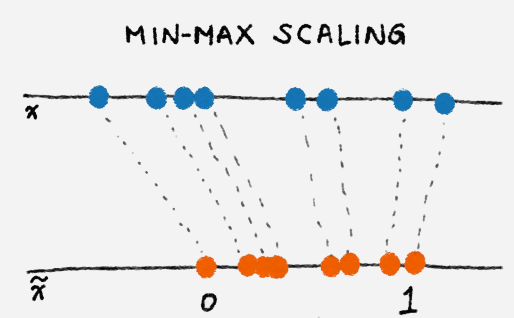

In [230]:
# hide_code
Image('references/images/minmax.png', width=500, height=100)

In [226]:
df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',')

list_col_scale = ['duracao', 'qtd_contatos_campanha']
df_callcenter[list_col_scale].tail()

,duracao,qtd_contatos_campanha
41183,334,1
41184,383,1
41185,189,2
41186,442,1
41187,239,3


In [227]:
from sklearn.preprocessing import MinMaxScaler


# trainnig data
scaler_transformer = MinMaxScaler().fit(df_callcenter[list_col_scale])

In [228]:
# transform columns
df_callcenter[list_col_scale] = scaler_transformer.transform(df_callcenter[list_col_scale])

df_callcenter[list_col_scale].tail()

,duracao,qtd_contatos_campanha
41183,0.0679138,0.0
41184,0.0778772,0.0
41185,0.0384303,0.0181818
41186,0.0898739,0.0
41187,0.048597,0.0363636


---

### Standardization (padronização)
- É a aplicação do log mais suave
- Significa alterar os valores para que o `desvio padrão = 1`
- Altera a distribuição, deixando mais próximo de uma distribuição normal.


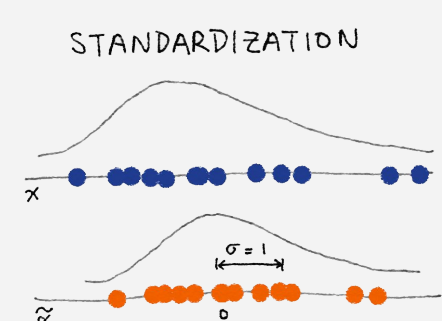

In [296]:
# hide_code
Image('references/images/standarization.png', width=500, height=100)

In [356]:
df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',')

list_col_scale = ['duracao', 'qtd_contatos_campanha']
df_callcenter = df_callcenter[list_col_scale]

df_callcenter[list_col_scale].tail()

,duracao,qtd_contatos_campanha
41183,334,1
41184,383,1
41185,189,2
41186,442,1
41187,239,3


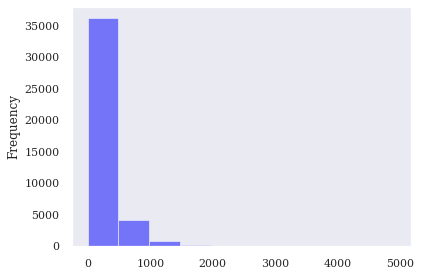

In [357]:
plt.figure()
df_callcenter['duracao'].plot.hist(alpha=0.5, color='blue')
plt.show()

In [358]:
from sklearn.preprocessing import StandardScaler


# trainnig data
scaler_transformer = StandardScaler().fit(df_callcenter[list_col_scale])

In [359]:
# transform columns
df_callcenter[list_col_scale] = scaler_transformer.transform(df_callcenter[list_col_scale])

df_callcenter[list_col_scale].tail()

,duracao,qtd_contatos_campanha
41183,0.292025,-0.565922
41184,0.481012,-0.565922
41185,-0.267225,-0.204909
41186,0.708569,-0.565922
41187,-0.0743802,0.156105


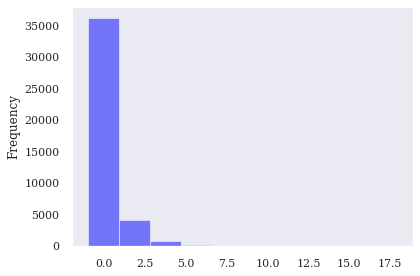

In [360]:
df_callcenter['duracao'].plot.hist(alpha=0.5, color='blue')
plt.show()

---

## Interaction Features
Simple linear models use a linear combination of the individual input features, x1, x2, ... xn to predict the outcome y.
- sum, diff, multiplication or division
- create feature combinations (nonlinear features).

- Usar o conhecimento de domínio para pensar sobre quais interações seriam prováveis

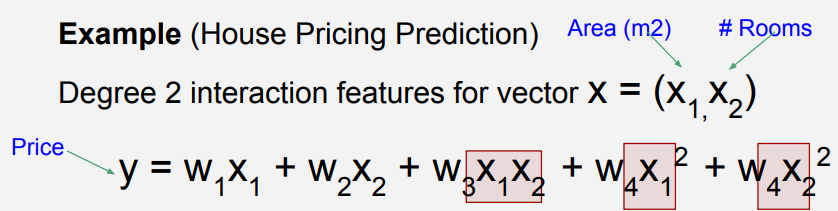

In [362]:
# hide_code
Image('references/images/interaction_features.png', width=700, height=100)

### Algoritms
- Qualquer algortimo não linear

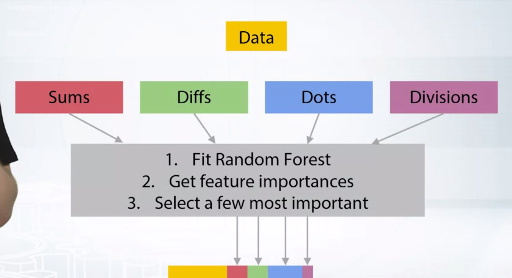

In [363]:
# hide_code
Image('references/images/interacion_feature_random.png', width=700, height=100)

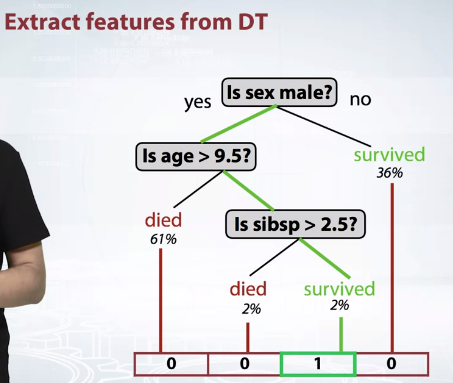

In [364]:
# hide_code
Image('references/images/extract_features.png', width=700, height=100)

In [ ]:
# extract feature from DT
tree_model.apply()

#### Example
Preços de produtos como uma feature

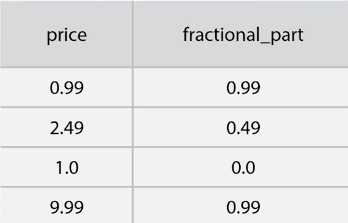

In [571]:
# hide_code
Image('references/images/feature_generation.png', width=400, height=100)

Podemos adicionar uma nova feature indicando parte fracionária desses preços.
<br/>
Por exemplo, se algum produto custa 2,49, a parte fracionária de seu preço é 0,49. Esse recurso pode ajudar o modelo a utilizar as diferenças na percepção das pessoas sobre esses preços. 
<br/>
Além disso, podemos encontrar padrões semelhantes em tarefas que exigem distinguir entre um humano e um robô. 

### `PolynomialFeatures()`

Generate a new feature matrix consisting of all polynomial combinations of the features

- Param: the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [564]:
df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',')

list_col_scale = ['duracao', 'idade']
df_callcenter = df_callcenter[list_col_scale]

df_callcenter.head()

,duracao,idade
0,261,56
1,149,57
2,226,37
3,151,40
4,307,56


In [2]:
# PolynomialFeatures()
from sklearn.preprocessing import PolynomialFeatures


# create object
poly = PolynomialFeatures(interaction_only=True,
                          include_bias=True,
                          degree=2)

# trainning and transform
feature_interaction = poly.fit_transform(df_callcenter)

NameError: name 'df_callcenter' is not defined

In [3]:
print('Type feature_interaction = ', type(feature_interaction), end='\n\n')
display(poly.get_feature_names(df_callcenter.columns))

NameError: name 'feature_interaction' is not defined

In [574]:
# create dataframe
df_interaction = pd.DataFrame(data=feature_interaction,  # numpy array
                              columns=poly.get_feature_names(df_callcenter.columns))

In [573]:
df_interaction.head()

,1,duracao,idade,duracao idade
0,1.0,261.0,56.0,14616.0
1,1.0,149.0,57.0,8493.0
2,1.0,226.0,37.0,8362.0
3,1.0,151.0,40.0,6040.0
4,1.0,307.0,56.0,17192.0


### Interaction Categorical Feature
Isso geralmente é útil para modelos não baseados em árvore, ou seja, modelo linear, kNN.

- Examples

Por exemplo, vamos supor que a feature target depende da feature `pclass` e `sex`. Se isso for verdade, o modelo linear pode ajustar suas previsões para todas as combinações possíveis dessas duas features.

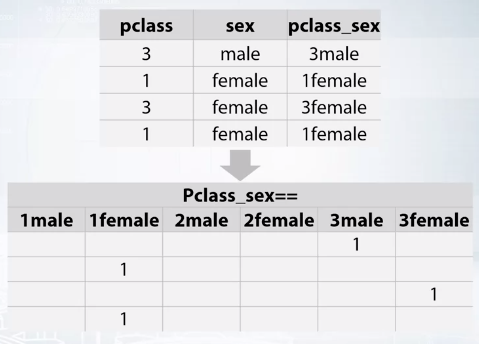

In [578]:
# hide_code
Image('references/images/cat_features.png', width=600, height=100)

---

## Binning
Split numerical values into bins and encode with a bin ID
- Discretização

In [371]:
fcc_survey_df = pd.read_csv('data/raw/fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


Text(0, 0.5, 'Frequency')

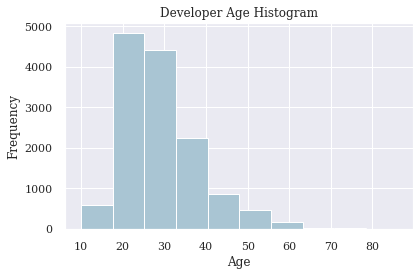

In [372]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

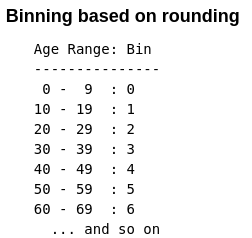

In [373]:
# hide_code
Image('references/images/binning_table.png', width=200, height=100)

In [376]:
fcc_survey_df['Age_bin'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin']].iloc[1071:1076]

,ID.x,Age,Age_bin
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


#### Binnig a Date-Time

Se você suspeitar que há relacionamentos entre tempos e outros atributos, você pode decompor uma data-hora em partes constituintes que podem permitir que os modelos descubram e explorem essas relações.

Por exemplo, você pode suspeitar que existe uma relação entre a hora do dia e outros atributos.

Você pode criar um novo recurso numérico chamado Hour_of_Day para a hora que pode ajudar um modelo de regressão.

Você poderia criar um novo recurso ordinal chamado Part_Of_Day com 4 valores Manhã , Meio-dia , Tarde , Noite com qualquer limite de hora que você achar relevante. Isso pode ser útil para uma árvore de decisão.